# **Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [2]:
dataset = pd.read_csv('data/market_cluster.csv', encoding='latin1')


In [3]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


In [4]:
dataset = pd.DataFrame(dataset)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
 11  profit_margin  9994 non-null   float64
 12  Cluster        9994 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


# **Data Cleaning & Preprocessing**

In [6]:
dataset.drop(['Order ID'], axis=1, inplace=True)

In [7]:
dataset.isna().sum()

Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
profit_margin    0
Cluster          0
dtype: int64

In [8]:
dataset.dropna(inplace=True)

In [9]:
def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

dataset = remove_outliers(dataset, 'Discount')
dataset = remove_outliers(dataset, 'Sales')
dataset = remove_outliers(dataset, 'Profit')

In [10]:
dataset.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


<AxesSubplot:xlabel='Cluster', ylabel='Count'>

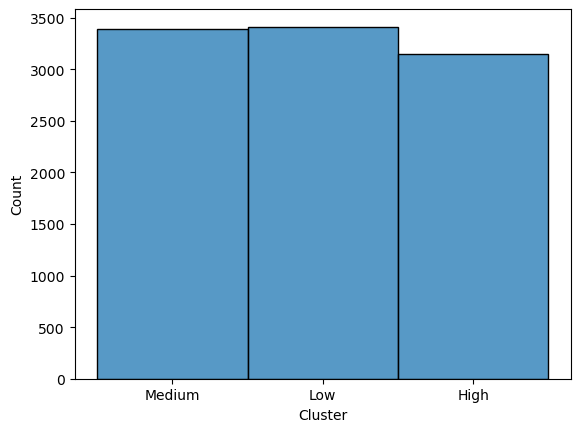

In [11]:
sns.histplot(dataset['Cluster'])

In [12]:
encoder = LabelEncoder()
scaler = StandardScaler()
onehot = OneHotEncoder()
minmaxscaler = MinMaxScaler()

In [13]:
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"])
dataset["Order Date"] = dataset["Order Date"].dt.month
dataset["Customer Name"] = onehot.fit_transform(dataset["Customer Name"].values.reshape(-1, 1)).toarray()
dataset["Category"] = onehot.fit_transform(dataset["Category"].values.reshape(-1, 1)).toarray()
dataset["City"] = onehot.fit_transform(dataset["City"].values.reshape(-1, 1)).toarray()
dataset["Region"] = onehot.fit_transform(dataset["Region"].values.reshape(-1, 1)).toarray()
dataset["State"] = onehot.fit_transform(dataset["State"].values.reshape(-1, 1)).toarray()
dataset["Sub Category"] = onehot.fit_transform(dataset["Sub Category"].values.reshape(-1, 1)).toarray()
dataset["Order Date"] = encoder.fit_transform(dataset["Order Date"])

In [14]:
dataset[["Sales", "Discount", "profit_margin"]] = scaler.fit_transform(dataset[["Sales", "Discount", "profit_margin"]])
dataset["Profit"] = minmaxscaler.fit_transform(dataset["Profit"].values.reshape(-1, 1))

In [15]:
class_to_numeric = {'Low': 0, 'Medium': 1, 'High': 2}
dataset['Cluster'] = [class_to_numeric[label] for label in dataset['Cluster']]

In [16]:
dataset.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,0.0,0.0,0.0,0.0,10,0.0,-0.414559,-1.430908,0.369225,1.0,0.595874,1
1,0.0,0.0,0.0,0.0,10,0.0,-1.291968,-0.627370,0.122296,1.0,-0.416872,1
2,0.0,0.0,1.0,0.0,5,0.0,1.507054,-0.225601,0.137417,1.0,-1.514014,0
3,0.0,0.0,0.0,0.0,9,0.0,-1.036563,0.310092,0.063185,1.0,-1.260827,0
4,0.0,0.0,0.0,0.0,9,0.0,1.498367,0.444015,0.877036,1.0,1.186643,2


# **Split Data and Encoder**

In [17]:
X = dataset.drop(['Cluster','Sub Category','State','Profit','profit_margin'],axis=1)
y = dataset['Profit']

In [18]:
X.head()

,Customer Name,Category,City,Order Date,Region,Sales,Discount
0,0.0,0.0,0.0,10,0.0,-0.414559,-1.430908
1,0.0,0.0,0.0,10,0.0,-1.291968,-0.627370
2,0.0,0.0,0.0,5,0.0,1.507054,-0.225601
3,0.0,0.0,0.0,9,0.0,-1.036563,0.310092
4,0.0,0.0,0.0,9,0.0,1.498367,0.444015


In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<AxesSubplot:>

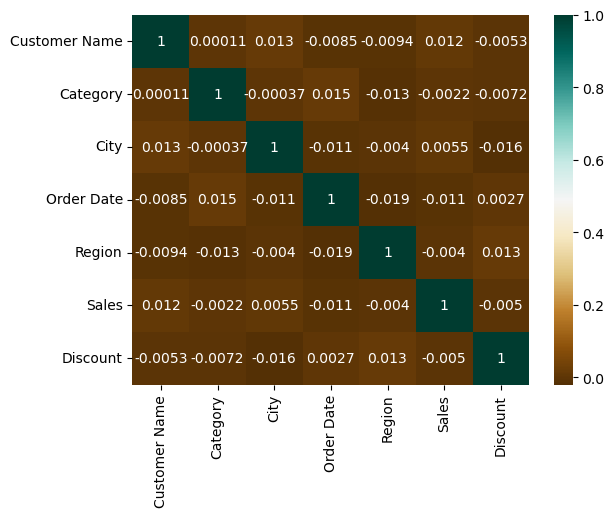

In [20]:
heatcol = X.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

In [21]:
print("Dimension of Train set",X_train.shape)
print("Dimension of Val set",X_val.shape)
print("Dimension of Test set",X_test.shape,"\n")

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Dimension of Train set (7960, 7)
Dimension of Val set (995, 7)
Dimension of Test set (996, 7) 

Number of numeric features: 7


# **SVM**

In [22]:
svm_model = SVR(epsilon=0.001, C=70)
svm_model.fit(X_train, y_train)

Y_pred = svm_model.predict(X_test)

In [23]:
import joblib
joblib.dump(svm_model, 'model/svmr_model.pkl')

['model/svmr_model.pkl']

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate MAE and MSE
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.14951529155880475
Mean Squared Error: 0.03454213786275686


In [25]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, Y_pred)
print("accuracy : ", r_squared)

accuracy :  0.2986481070474416


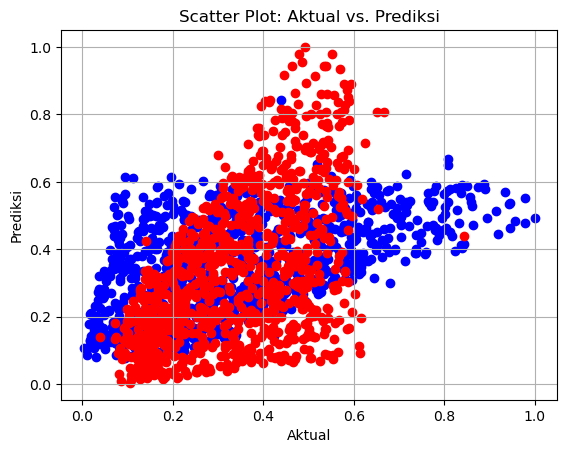

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, Y_pred, c='blue', label='Actual', marker='o')
plt.scatter(Y_pred, y_test, c='red', label='Predicted', marker='o')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter Plot: Aktual vs. Prediksi")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.grid(True)
plt.show()


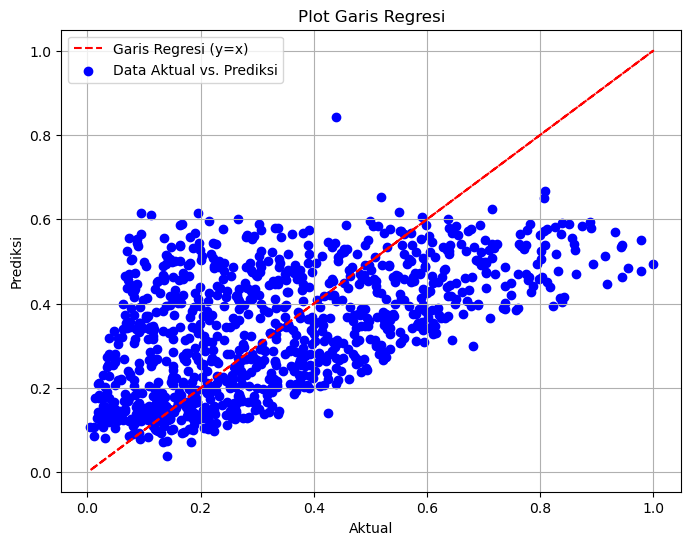

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_test, 'r--', label="Garis Regresi (y=x)")
plt.scatter(y_test, Y_pred, c='blue', label="Data Aktual vs. Prediksi")
plt.title("Plot Garis Regresi")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.legend()
plt.grid(True)
plt.show()